# <font color=#138D75> **Introduction to Jupyter**</font> 

## <font color=#138D75> Cell types</font> 

A Jupyter notebook consists of a number of different cells which can be executed in any order. Cells can be of three types, but the two types important for us are:
- **Markdown** $-$ where you write text and equations, can add hyperlinks, figures, and more.
- **Code** $-$ which contain executable (Python) code.

The cell-type is selected in a scroll-down list at the top of the notebook window. A cell is executed by selecting the cell and pressing `shift`+`enter`, or the `run` button (&#9654;) at the top. 
- For markdown cells, this formats the text.
- For code cells, it runs the code.

The results of running code cells are saved in memory. It is often a good idea to separate your code into several blocks.

### <font color=#138D75> Markdown cells </font>

[Markdown](https://www.markdownguide.org/) is a lightweight language for creating formatted text, including equations which can be written in a syntax very similar to Latex, for example:

$$
\mathbf{F} = m\, \mathbf{a}.
$$

To modify a **markdown** cell, simply double click on it.
Besides text and equations, it's also possible to add images by dragging and dropping the image file to the **markdown** cell in edit mode. More information about the basic syntax of markdown can be found [here](https://www.markdownguide.org/basic-syntax).

### <font color=#138D75> Code cells </font>

Code cells are executable blocks of Python code. For example, we can define a routine and use it subsequently:

In [ ]:
def sum_numbers(a, b):
    return a + b

In [ ]:
sum_numbers(1, 2.0)

### <font color=#138D75> The Python ecosystem </font> 

Python has a large number of modules and packages available, the main ones which we will use in this notebook are:

- `numpy`: large collection of mathematical functionalities
- `matplotlib`: library for plotting
- `scipy`: library for scientific and technical computing
- `h5py`: library for writting and reading binary checkpoint files.

These modules can be loaded as a whole (often given an alias to avoid function collisions and overwriting), or by loading specific submodules.

In [ ]:
import numpy as np
import scipy
import h5py
from matplotlib import pyplot as plt

Functionalities from the packages are used by calling the appropriate package and routine. You can directly access the documentation for any package, class, or routine, by running `help` on the object/routine you are interested in. For example: 

In [ ]:
help(plt.plot)

## <font color=#138D75> Exercises</font>

Fill in the missing code blocks to solve the following exercises.

### <font color=#138D75> 1. The Morse potential</font>

Consider the one dimensional Morse potential

$$ V(x) = D_e\left[1 - e^{-a(x-x_0)}\right]^2 $$

which models the potential energy curve of a diatomic molecule, where $x_0$ is the equilibrium distance, $D_e$ the asymptotic limit and $a$ measures of the width of the potential well.

For given values of $D_e$, $x_0$, and $a$, implement a function in Python to calculate the Morse potential for a set of values of x defined by a Numpy array. Plot the result.

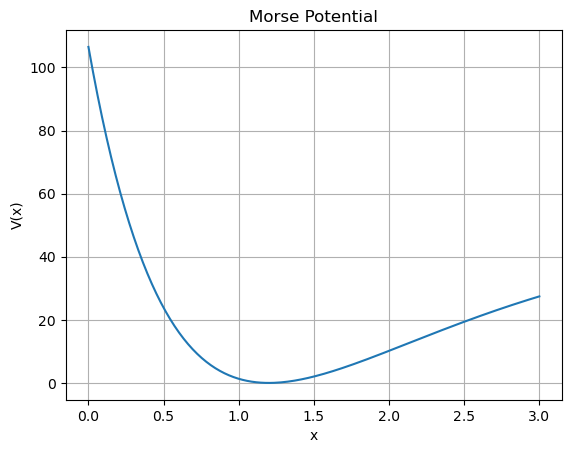

In [6]:
# D_e = 5.0
# x_0 = 1.2
# a = 0.75

# def V(x):
#     return ...

import numpy as np
import matplotlib.pyplot as plt

# Given parameters
D_e = 50.0
x_0 = 1.2
a = 0.75

# Morse potential function
def V(x):
    return D_e * (1 - np.exp(-a * (x - x_0)))**2

# Define a set of x values
x_values = np.linspace(0, 3, 200)  # from 0 to 3 with 200 points

# Calculate the potential
V_values = V(x_values)

# Plot the result
plt.plot(x_values, V_values)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Morse Potential')
plt.grid(True)
plt.show()


    

Use `np.linspace` or `np.arange` to create an array of x values.

In [ ]:
x = ...
y = V(x)

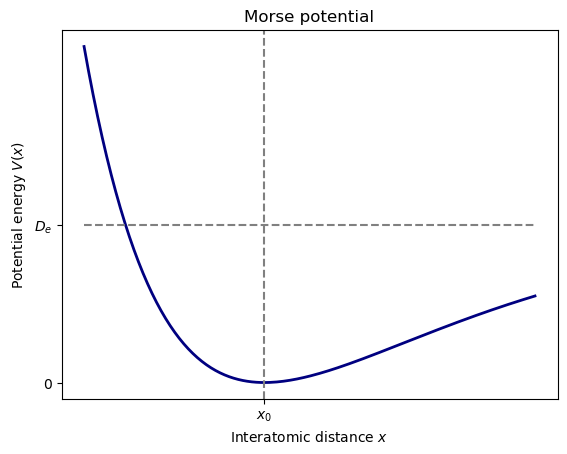

In [9]:
# Plot the Morse potential
x_min = np.min(x_values)
x_max = np.max(x_values)

plt.plot(x_values, V_values, color="navy", linewidth=2.0)
plt.hlines(D_e, x_min, x_max, linestyles="dashed", color="gray")
plt.axvline(x_0, ls="--", color="gray")
plt.xticks([x_0], ['$x_0$'])
plt.yticks([0, D_e], ['0', '$D_e$'])
plt.title('Morse potential')
plt.xlabel('Interatomic distance $x$')
plt.ylabel('Potential energy $V(x)$')
plt.show()

**Q1**. How do the parameters $D_e$, $a$, and $x_0$ affect the potential shape?

𝐷_𝑒 → depth of the well. 
𝑥_0 → horizontal location of the minimum. 
𝑎 → how sharp or wide the well is around the minimum.

### <font color=#138D75> 2. The gradient of the Morse potential</font>
Implement a routine which calculates and plots the gradient of the Morse potential. You can either calculate the gradient analytically or numerically.

In [12]:
def grad_V(x):
    """Analytical gradient of the Morse potential."""
    return 2 * D_e * a * np.exp(-a * (x - x_0)) * (1 - np.exp(-a * (x - x_0)))


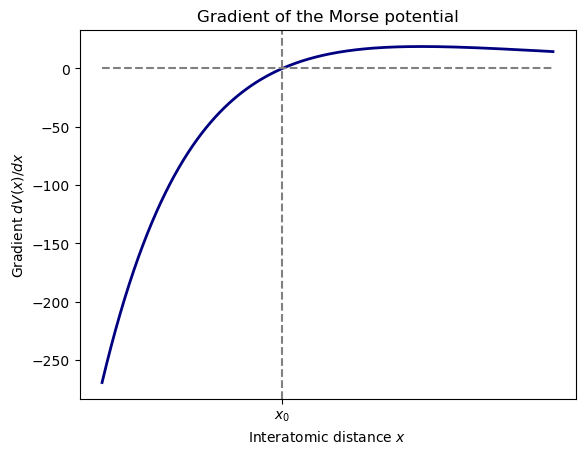

In [13]:
# Plot the function
x_min = np.min(x_values)
x_max = np.max(x_values)

plt.plot(x_values, grad_V(x_values), color="navy", linewidth=2.0)
plt.hlines(0, x_min, x_max, linestyles="dashed", color="gray")
plt.axvline(x_0, ls="--", color="gray")
plt.xticks([x_0], ['$x_0$'])
plt.title('Gradient of the Morse potential')
plt.xlabel('Interatomic distance $x$')
plt.ylabel('Gradient $dV(x)/dx$')
plt.show()

**Q2**. How can you determine that your gradient has been implemented correctly?


At 𝑥 = 0  , x=x_0 : gradient = 0 
At 𝑥 < 0  , x<x_0 : gradient > 0 
At 𝑥 > 0  , x>x_0 : gradient < 0

### <font color=#138D75> 3. The MP2 energy correction </font>
For a closed-shell Hartree-Fock reference, the MP2 energy correction can be written as:

$$
E^{(2)} = E^{(2)}_\mathrm{os} + E^{(2)}_\mathrm{ss}
$$

where

$$
E^{(2)}_\mathrm{os}= - \sum_{i,j}\sum_{a, b}\frac{(ia|jb)(ia|jb)}{\epsilon_a + \epsilon_b - \epsilon_i - \epsilon_j}
$$

$$
E^{(2)}_\mathrm{ss} = - \sum_{i,j}\sum_{a, b}\frac{(ia|jb)}{\epsilon_a + \epsilon_b - \epsilon_i - \epsilon_j}[(ia|jb) - (ib|ja)]
$$

Here, $(ia|jb)$ are electron repulsion integrals in Chemist notation, $\epsilon_i$, $\epsilon_j$ are the orbital energy eigenvalues of occupied orbitals, while $\epsilon_a$, $\epsilon_b$ are orbital energy eigenvalues of virtual (unoccupied) orbitals.

The electron repulsion integrals calculated for the water molecule are stored as 4-dimensional Numpy arrays in the [water.h5](https://drive.google.com/file/d/1H_Xd4Sw1FqlKnvUD8SNogQaDeN6t3yfB/view?usp=sharing) checkpoint file and are labelled as "ovov". The occupied and virtual orbital energies are stored as 1D arrays labelled "e_occ", respectively "e_vir". Download the checkpoint file, read in the data and print the array shapes. 

In [16]:
import h5py
import numpy as np

# Open the file for reading
checkpoint_file = h5py.File("water.h5", "r")

# Electron repulsion integrals
ovov = np.array(checkpoint_file.get("ovov"))

# Occupied and virtual orbital energies
e_occ = np.array(checkpoint_file.get("e_occ"))
e_vir = np.array(checkpoint_file.get("e_vir"))

# Close the checkpoint file
checkpoint_file.close()

In [17]:
print("Shape of ovov :", ovov.shape)
print("Shape of e_occ:", e_occ.shape)
print("Shape of e_vir:", e_vir.shape)

Shape of ovov : (5, 19, 5, 19)
Shape of e_occ: (5,)
Shape of e_vir: (19,)


Using Numpy routines or for-loops, calculate the following quantity

$$
\frac{(ia|jb)}{\epsilon_a + \epsilon_b - \epsilon_i - \epsilon_j}
$$    
and save it to the checkpoint file with label "ovov_div_eijab".

In [23]:
import h5py
import numpy as np

# --- read ---
with h5py.File("water.h5", "r") as f:
    ovov = np.array(f["ovov"])       # (i,a,j,b)
    e_occ = np.array(f["e_occ"])     # (i)
    e_vir = np.array(f["e_vir"])     # (a)

# --- compute ---
denom = (
    e_vir[None, :, None, None]          # ε_a
    + e_vir[None, None, None, :]        # ε_b
    - e_occ[:, None, None, None]        # -ε_i
    - e_occ[None, None, :, None]        # -ε_j
)

with np.errstate(divide="ignore", invalid="ignore"):
    ovov_div_eijab = ovov / denom
    ovov_div_eijab = np.nan_to_num(ovov_div_eijab)

with h5py.File("water.h5", "a") as f:
    if "ovov_div_eijab" in f:
        del f["ovov_div_eijab"] 
    f.create_dataset(
        "ovov_div_eijab",
        data=ovov_div_eijab,
        compression="gzip",
        compression_opts=4,
    )

print("Saved ovov_div_eijab with shape:", ovov_div_eijab.shape)


Saved ovov_div_eijab with shape: (5, 19, 5, 19)


In [24]:
import h5py, numpy as np

with h5py.File("water.h5", "r") as f:
    T = f["ovov_div_eijab"][...]            # shape (i,a,j,b)

print("Symmetry check (i,a,j,b) vs (j,b,i,a):",
      np.allclose(T, T.transpose(2,3,0,1)))
print("Max abs diff:", np.max(np.abs(T - T.transpose(2,3,0,1))))


Symmetry check (i,a,j,b) vs (j,b,i,a): True
Max abs diff: 1.5959455978986625e-16


Using the `einsum` routine of Numpy, calculate the MP2 energy correction based on the `ovov_div_eijab` array and the equations: 

$$
E^{(2)} = E^{(2)}_\mathrm{os} + E^{(2)}_\mathrm{ss}
$$

where

$$
E^{(2)}_\mathrm{os}= - \sum_{i,j}\sum_{a, b}\frac{(ia|jb)(ia|jb)}{\epsilon_a + \epsilon_b - \epsilon_i - \epsilon_j}
$$

$$
E^{(2)}_\mathrm{ss} = - \sum_{i,j}\sum_{a, b}\frac{(ia|jb)}{\epsilon_a + \epsilon_b - \epsilon_i - \epsilon_j}[(ia|jb) - (ib|ja)]
$$

In [28]:
e_os = -np.einsum("iajb,iajb->", ovov, ovov_div_eijab)

# Same-spin term
e_ss = -np.einsum("iajb,iajb->", ovov, ovov_div_eijab) \
       + np.einsum("iajb,ibja->", ovov, ovov_div_eijab)

# Total MP2 correlation energy
e_mp2 = e_os + e_ss

print("E_os =", e_os)
print("E_ss =", e_ss)
print("E_MP2 =", e_mp2)


E_os = -0.15416847133812459
E_ss = -0.05160390024471423
E_MP2 = -0.20577237158283881


Verify that your result is correct by comparing to the energy correction read from checkpoint:

In [29]:
checkpoint_file = h5py.File("water.h5", "r")
mp2_ref = np.array(checkpoint_file.get("mp2_energy"))[0]
checkpoint_file.close()

In [30]:
print("Reference MP2 energy correction: %.5f H." % mp2_ref)

Reference MP2 energy correction: -0.20577 H.


In [31]:
print("My MP2 correction: %.5f H." % e_mp2)

My MP2 correction: -0.20577 H.
